In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import StandardScaler as ss
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"C:\Users\bshik\Downloads\Social_Network_Ads (2).csv")

In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
#Feature scaling 


In [7]:
x=df.iloc[:,2:4]
y=df.iloc[:,4].values

In [8]:
# Splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [9]:
x_train.shape
x_test.shape

(120, 2)

In [10]:

scaler =ss()

In [11]:
scaler.fit(x_train)

StandardScaler()

In [12]:
x_train_scaled= scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
#convert to numpy
x_train_scaled= pd.DataFrame(x_train_scaled,columns = x_train.columns)

In [14]:
x_test_scaled =pd.DataFrame(x_test_scaled,columns= x_test.columns)

In [15]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [16]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


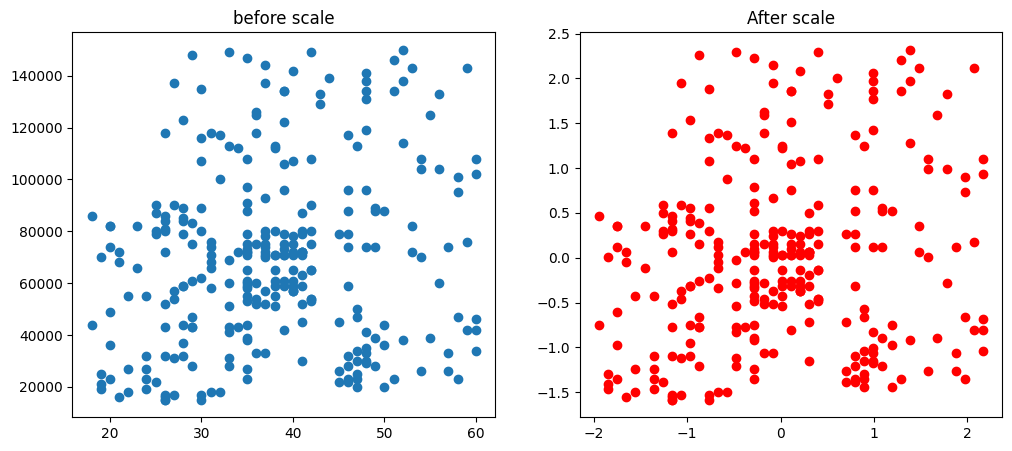

In [17]:
fig, ( ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('before scale')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='Red')
ax2.set_title('After scale')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
dt = DecisionTreeClassifier()
dt_scaled= DecisionTreeClassifier()

In [20]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dt.predict(x_test)

In [22]:
y_pred_scaled= dt_scaled.predict(x_test_scaled)

In [23]:
print('Actual',accuracy_score(y_test,y_pred))
print('scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.875
scaled 0.875
